In [1]:
#!sudo apt install graphviz
#!pip install numpy
#!pip install tensorflow==2.3.0
#!pip install gym
#!pip install keras
#!pip install keras-rl2
#!pip install pydot

In [2]:
import numpy as np
from src.env.MillEnv_Descrete import MillEnviroment

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
from tensorflow import keras

In [5]:
env = MillEnviroment()

In [6]:
states_shape = env.observation_space.shape
actions = env.action_space.n

In [7]:
print(states_shape)
print(actions)

(26,)
624


In [8]:
def build_model(states_shape, actions):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(1, 26)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Flatten())
    model.add(Dense(actions, activation='linear'))
    return model


In [9]:
model = build_model(states_shape, actions)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 512)            13824     
_________________________________________________________________
dense_1 (Dense)              (None, 1, 512)            262656    
_________________________________________________________________
dense_2 (Dense)              (None, 1, 512)            262656    
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 624)               320112    
Total params: 859,248
Trainable params: 859,248
Non-trainable params: 0
_________________________________________________________________


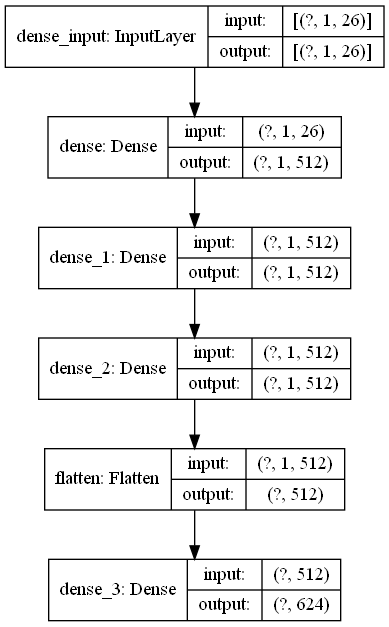

In [11]:
keras.utils.plot_model(model, "mill_dqn_model_shape.png", show_shapes=True)

In [10]:

def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=int(10e+9), window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=int(10e+8), target_model_update=1e-2)
    return dqn

In [11]:
int(10e+10)

100000000000

In [12]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="./tensorboards/nine_mens_mill_keras_neg_reward/DQN_4", histogram_freq=0, write_graph=True, write_images=True)
tensorboard_callback.set_model(model)

In [ ]:
class Metrics(keras.callbacks.Callback):
    def __init__(self, agent):
        keras.callbacks.Callback.__init__
        self.agent = agent
        
    def on_train_begin(self, logs={}):
        self.metrics = {key : [] for key in self.agent.metrics_names}

    def on_step_end(self, episode_step, logs):
        for ordinal, key in enumerate(self.agent.metrics_names, 0):
            self.metrics[key].append(logs.get('metrics')[ordinal])

In [14]:
dqn = build_agent(model, actions)
metrics = Metrics(dqn)
dqn.compile(Adam(learning_rate=0.1), metrics=['accuracy'])
dqn.fit(env, nb_steps=int(10e+10), visualize=False, verbose=1, callbacks=[tensorboard_callback, metrics])

 B--W--W | | 
| B----B----O | 
B------B------O


B------W------O
| O----W----O | 
| | O--W--O | | 
| | |     | | | 
B-W-W	  B-W-O
| | |     | | | 
| | B--W--W | | 
| B----B----O | 
B------B------O


B------W------O
| O----W----O | 
| | O--W--O | | 
| | |     | | | 
B-W-W	  B-W-O
| | |     | | | 
| | B--W--W | | 
| B----B----O | 
B------B------O


B------W------O
| O----W----O | 
| | O--W--O | | 
| | |     | | | 
B-W-W	  B-W-O
| | |     | | | 
| | B--W--W | | 
| B----B----O | 
B------B------O


B------W------O
| O----W----O | 
| | O--W--O | | 
| | |     | | | 
B-W-W	  B-W-O
| | |     | | | 
| | B--W--W | | 
| B----B----O | 
B------B------O


B------W------O
| O----W----O | 
| | O--W--O | | 
| | |     | | | 
B-W-W	  B-W-O
| | |     | | | 
| | B--W--W | | 
| B----B----O | 
B------B------O


B------W------O
| O----W----O | 
| | O--W--O | | 
| | |     | | | 
B-W-W	  B-W-O
| | |     | | | 
| | B--W--W | | 
| B----B----O | 
B------B------O


B------W------O
| O----W----O | 
| | O--W--O | | 
|

In [ ]:
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [ ]:
save_model(model, "./nine_mens_mill_dqn")